In [1]:
from platform import python_version

print(python_version())

3.12.3


In [2]:
pip install -r requirements.txt

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-w1tjtk61
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-w1tjtk61
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 897f4448b14d18b4d0a430f57f11c2dcb6200c20
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [3]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [4]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "lam3AN0GvvpVGwJQk6RMDDaWKNdoPvJqo2LTooXEz0ml"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/84889df94a104432b27b1d04dd4411f7:27251608-ce74-48a1-be7d-54412f5a9a59::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [5]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'lam3AN0GvvpVGwJQk6RMDDaWKNdoPvJqo2LTooXEz0ml',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/84889df94a104432b27b1d04dd4411f7:27251608-ce74-48a1-be7d-54412f5a9a59::',
  'verify': True,
  'private_endpoint': False}}

In [6]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

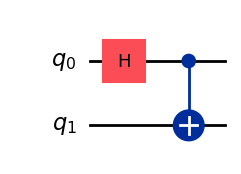

In [7]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

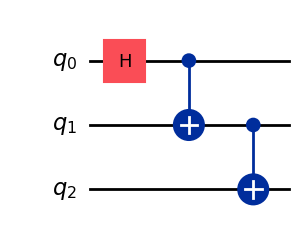

In [8]:
# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)

# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)

# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)

### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [9]:
# Submit your answer using following code
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


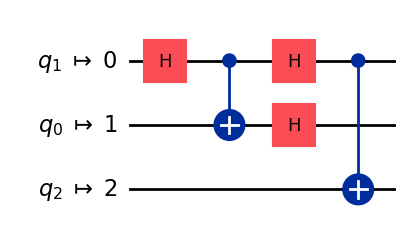

In [13]:
### WRITE YOUR CODE BELOW HERE ###
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0,1],[0,2]]

# Transpile the quantum circuit `qc` using the `transpile` function and the coupling map
from qiskit import transpile
qc_transpiled = transpile(qc, coupling_map=coupling_map)
### YOUR CODE FINISHES HERE    ###

qc_transpiled.draw("mpl")

In [14]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [15]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

In [19]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'000': 502, '111': 522}


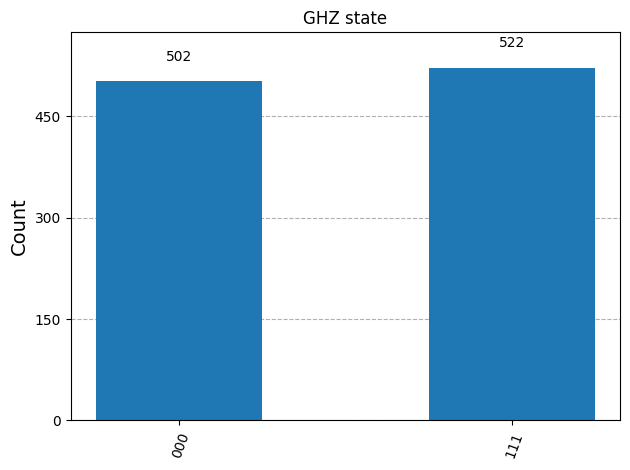

In [20]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(0.02197265625)), ('ZZX', np.float64(-0.021484375)), ('ZII', np.float64(0.02490234375)), ('XXI', np.float64(0.0126953125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


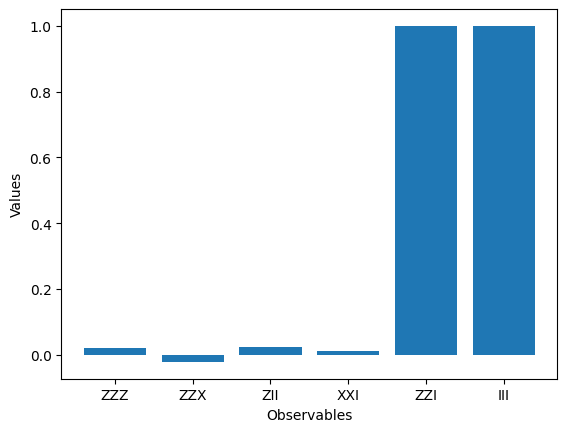

In [21]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [29]:
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    Session,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)
 
service = QiskitRuntimeService(name="qgss-2025")

In [22]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 914 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 2 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


In [47]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService(name="qgss-2025")

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_torino quantum computer


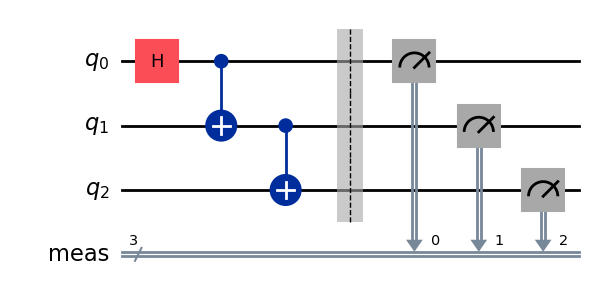

In [48]:
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

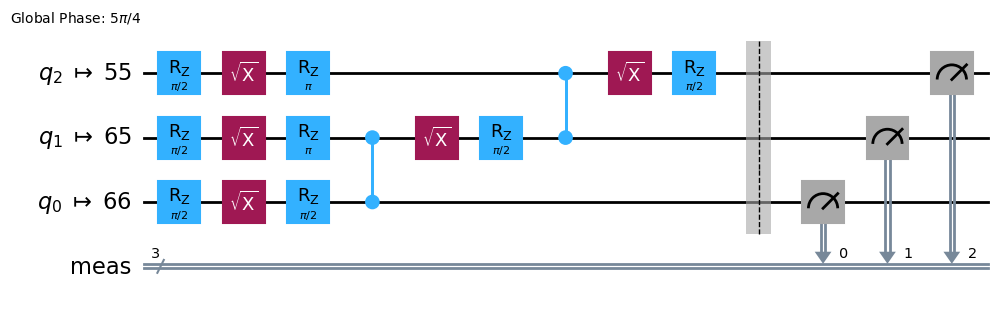

In [44]:

# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = backend.configuration().coupling_map

# Transpile the quantum circuit `qc` using the `transpile` function and the coupling map
from qiskit import transpile
qc_transpiled = transpile(qc,  backend=backend)
### YOUR CODE FINISHES HERE    ###

qc_transpiled.draw("mpl")

In [49]:
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    Batch,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)
 
 
service = QiskitRuntimeService(name="qgss-2025")

In [50]:
# Create a new batch
batch = Batch(backend=backend)
estimator = Estimator(mode=batch)
sampler = Sampler(mode=batch)
# Close the batch because no context manager was used.


In [ ]:
with Batch(backend=backend) as batch:
    estimator = Estimator()
    sampler = Sampler()
    job1 = estimator.run([qc_transpiled])
    job2 = sampler.run([qc_transpiled])
 


In [ ]:
# The batch is no longer accepting jobs but the submitted job will run to completion.
result = job1.result()
result2 = job2.result()

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-07-07 16:22:36', stop='2025-07-07 16:22:38', size=4096>)])}, 'version': 2})

In [53]:
print(result2[0].data.meas.get_counts())

{'000': 2144, '111': 1795, '100': 29, '110': 43, '101': 17, '001': 23, '011': 40, '010': 5}


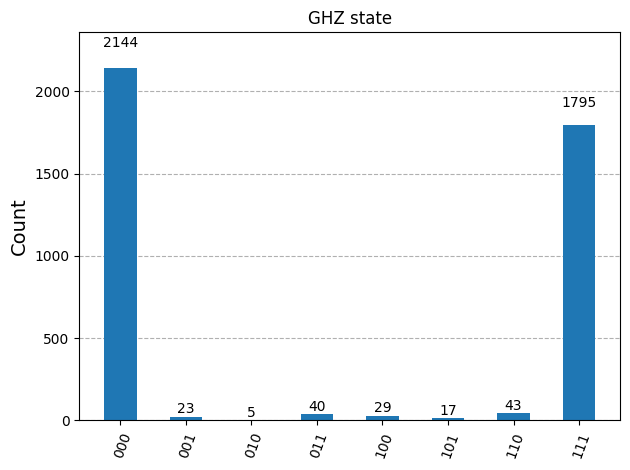

In [54]:
plot_histogram(result2[0].data.meas.get_counts(), title="GHZ state")